In [1]:
import pandas as pd

raw_data = pd.read_csv('./healthcare-dataset-stroke-data.csv')
raw_data.drop('id', axis=1, inplace=True)


# EXPLORATION & PREPROCESSING

In [2]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [3]:
print(raw_data['work_type'].value_counts())
print(raw_data['Residence_type'].value_counts())
print(raw_data['smoking_status'].value_counts())

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


In [4]:
raw_data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


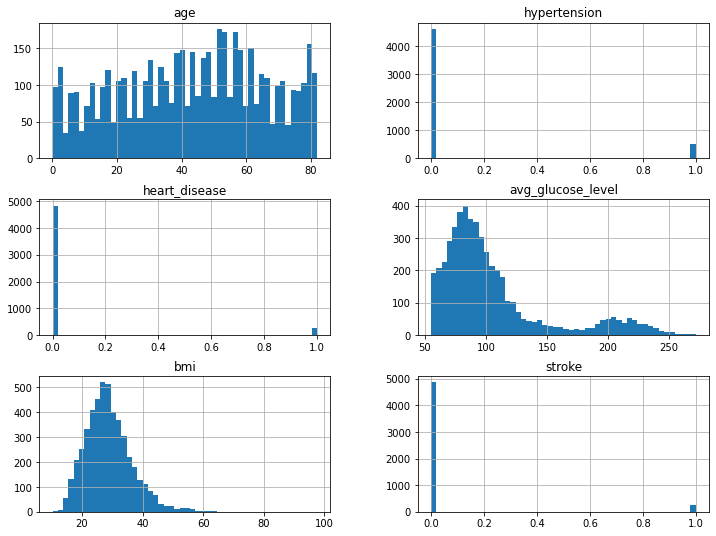

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
raw_data.hist(bins=50, figsize=(12,9))
plt.show()

**Kami melihat korelasi tiap fitur terhadap stroke label**

In [6]:
corr_matrix = raw_data.corr()
corr_matrix['stroke'].sort_values(ascending=False)

stroke               1.000000
age                  0.245257
heart_disease        0.134914
avg_glucose_level    0.131945
hypertension         0.127904
bmi                  0.042374
Name: stroke, dtype: float64

**Karena bmi memiliki korelasi yang cukup rendah, kami memutuskan untuk tidak memakai fitur ini.**


In [7]:
stroke_features = raw_data.drop(['bmi', 'stroke'], axis=1)
stroke_labels = raw_data['stroke'].copy()

**Disini kelompok kami mengetahui bahwa stroke label memiliki ketidak seimbangan (imbalance class)**

0    4861
1     249
Name: stroke, dtype: int64
ratio: 19.522088353413654:1.0


<AxesSubplot:>

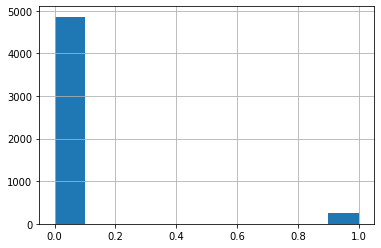

In [8]:
class_count = raw_data['stroke'].value_counts()

print(class_count)
print('ratio: ' + str(class_count[0]/class_count[1]) + ':' + str(class_count[1]/class_count[1]))

raw_data['stroke'].hist()


**Kami melakukan encoding terhadap fitur yang memiliki value berupa string**

In [9]:
from sklearn.preprocessing import OrdinalEncoder

scaler = OrdinalEncoder()
smote_features = scaler.fit_transform(stroke_features[['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']])

In [10]:
stroke_features[['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']] = smote_features

In [11]:
stroke_features

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status
0,1.0,67.0,0,1,1.0,2.0,1.0,228.69,1.0
1,0.0,61.0,0,0,1.0,3.0,0.0,202.21,2.0
2,1.0,80.0,0,1,1.0,2.0,0.0,105.92,2.0
3,0.0,49.0,0,0,1.0,2.0,1.0,171.23,3.0
4,0.0,79.0,1,0,1.0,3.0,0.0,174.12,2.0
...,...,...,...,...,...,...,...,...,...
5105,0.0,80.0,1,0,1.0,2.0,1.0,83.75,2.0
5106,0.0,81.0,0,0,1.0,3.0,1.0,125.20,2.0
5107,0.0,35.0,0,0,1.0,3.0,0.0,82.99,2.0
5108,1.0,51.0,0,0,1.0,2.0,0.0,166.29,1.0


**Sesuai dengan penjelasan yang kami berikan pada presentasi, kami menerapkan SMOTE untuk mengatasi permasalahan imbalanced class pada label kami.**

In [12]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
stroke_features, stroke_labels = smote.fit_resample(stroke_features, stroke_labels)

**Disini kami mengetahui bahwa SMOTE telah berhasil melakukan oversampling terhadap stroke label.**

0    4861
1    4861
Name: stroke, dtype: int64
ratio: 1.0:1.0


<AxesSubplot:>

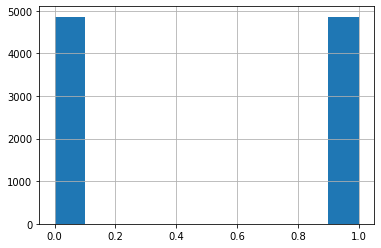

In [13]:
class_count = stroke_labels.value_counts()

print(class_count)
print('ratio: ' + str(class_count[0]/class_count[1]) + ':' + str(class_count[1]/class_count[1]))

stroke_labels.hist()

**Kami melakukan pengecekkan kembali apakah dataset yang kami miliki masih memiliki null values atau tidak.**


In [14]:
stroke_features.isnull().count()

gender               9722
age                  9722
hypertension         9722
heart_disease        9722
ever_married         9722
work_type            9722
Residence_type       9722
avg_glucose_level    9722
smoking_status       9722
dtype: int64

In [15]:
stroke_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9722 entries, 0 to 9721
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             9722 non-null   float64
 1   age                9722 non-null   float64
 2   hypertension       9722 non-null   int64  
 3   heart_disease      9722 non-null   int64  
 4   ever_married       9722 non-null   float64
 5   work_type          9722 non-null   float64
 6   Residence_type     9722 non-null   float64
 7   avg_glucose_level  9722 non-null   float64
 8   smoking_status     9722 non-null   float64
dtypes: float64(7), int64(2)
memory usage: 683.7 KB


**Kami melakukan splitting dataset untuk membagi dataset menjadi train dan test dengan ratio 8 : 2.**

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(stroke_features, stroke_labels, random_state=22, test_size=0.2)

from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
X_train = std_scaler.fit_transform(X_train)

# TRAINING

# 1st Method: Support Vector Machine - Classifier (SVC)

In [17]:
from sklearn.svm import SVC

svc_clf = SVC(gamma='auto', random_state=22)
svc_clf.fit(X_train, y_train)

SVC(gamma='auto', random_state=22)

In [18]:
X_test = std_scaler.transform(X_test)

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

predictions_test = svc_clf.predict(X_test)

print(accuracy_score(y_test, predictions_test))
print(precision_score(y_test, predictions_test))
print(recall_score(y_test, predictions_test))
print(f1_score(y_test, predictions_test))

cross_val_score(svc_clf, stroke_features, stroke_labels, cv=3, scoring='accuracy')

0.8745501285347044
0.8677248677248677
0.873269435569755
0.870488322717622


array([0.92039494, 0.91082999, 0.91234568])

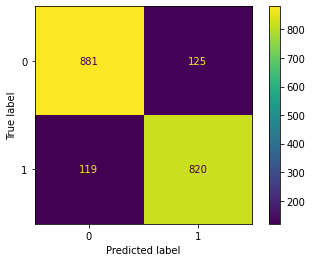

In [20]:
from sklearn.metrics import plot_confusion_matrix

predictions_test = svc_clf.predict(X_test)
plot_confusion_matrix(svc_clf, X_test, y_test)

# 2nd Method: Feedforward Neural Network (FNN)

In [21]:
from tensorflow import keras

model = keras.models.Sequential([
    keras.layers.Dense(128, activation=keras.activations.relu, input_shape=[9]),
    keras.layers.Dense(128, activation=keras.activations.relu),
    keras.layers.Dense(128, activation=keras.activations.relu),
    keras.layers.Dense(1, activation=keras.activations.sigmoid)
])

In [22]:
model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.Adam(learning_rate=0.01),
              metrics=[keras.metrics.Recall()])

In [23]:
checkpoint_filepath = './Model/bestModel'
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='loss',
    mode='max',
    save_best_only=True)

In [24]:
model.fit(X_train, y_train,epochs=500, callbacks=[model_checkpoint_callback])


Epoch 1/500
244/244 [==============================] - 1s 1ms/step - loss: 0.4772 - recall: 0.7948
Epoch 2/500
244/244 [==============================] - 0s 1ms/step - loss: 0.3948 - recall: 0.8738
Epoch 3/500
244/244 [==============================] - 0s 1ms/step - loss: 0.3227 - recall: 0.8698
Epoch 4/500
244/244 [==============================] - 0s 1ms/step - loss: 0.3069 - recall: 0.8678
Epoch 5/500
244/244 [==============================] - 0s 1ms/step - loss: 0.3006 - recall: 0.8658
Epoch 6/500
244/244 [==============================] - 0s 1ms/step - loss: 0.2923 - recall: 0.8887
Epoch 7/500
244/244 [==============================] - 0s 1ms/step - loss: 0.2647 - recall: 0.8796
Epoch 8/500
244/244 [==============================] - 0s 1ms/step - loss: 0.2673 - recall: 0.8815
Epoch 9/500
244/244 [==============================] - 0s 1ms/step - loss: 0.2521 - recall: 0.8900
Epoch 10/500
244/244 [==============================] - 0s 1ms/step - loss: 0.2515 - recall: 0.8935
Epoch 11/

In [25]:
model.load_weights(checkpoint_filepath)

In [26]:
model.evaluate(X_test, y_test)

61/61 [==============================] - 0s 615us/step - loss: 0.4276 - recall: 0.9244


[0.42761939764022827, 0.9243876338005066]

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("FNN")
print(accuracy_score(y_test, predictions_test))
print(precision_score(y_test, predictions_test))
print(recall_score(y_test, predictions_test))
print(f1_score(y_test, predictions_test))


FNN
0.8745501285347044
0.8677248677248677
0.873269435569755
0.870488322717622


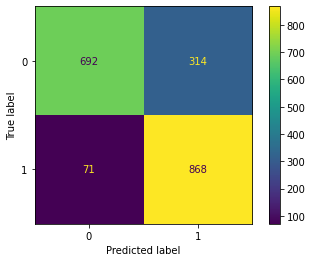

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
predictions_test = (model.predict(X_test) > 0.5).astype('int32')

disp = ConfusionMatrixDisplay(confusion_matrix(y_test, predictions_test))
disp.plot()

# 3rd Method: Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)


DecisionTreeClassifier()

In [30]:
predictions_test = tree.predict(X_test)

print("Decision Tree")
print(accuracy_score(y_test, predictions_test))
print(precision_score(y_test, predictions_test))
print(recall_score(y_test, predictions_test))
print(f1_score(y_test, predictions_test))

cross_val_score(tree, stroke_features, stroke_labels, cv=3, scoring='accuracy')

Decision Tree
0.9460154241645244
0.9493534482758621
0.9382321618743344
0.9437600428494911


array([0.914224  , 0.95155816, 0.95061728])

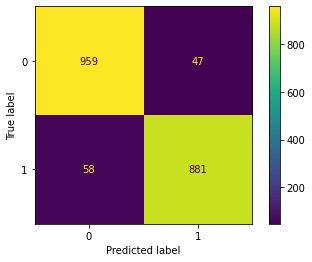

In [31]:
predictions_test = (tree.predict(X_test) > 0.5).astype('int32')

disp = ConfusionMatrixDisplay(confusion_matrix(y_test, predictions_test))
disp.plot()

# 4th Method: Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression

log_Reg_clf = LogisticRegression(max_iter=500)
log_Reg_clf.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [33]:
predictions_test = log_Reg_clf.predict(X_test)

print("Logistic Regression")
print(accuracy_score(y_test, predictions_test))
print(precision_score(y_test, predictions_test))
print(recall_score(y_test, predictions_test))
print(f1_score(y_test, predictions_test))

cross_val_score(log_Reg_clf, stroke_features, stroke_labels, cv=3, scoring='accuracy')

Logistic Regression
0.7773778920308483
0.7495069033530573
0.8093716719914803
0.778289810547875


array([0.77044122, 0.7769207 , 0.78395062])

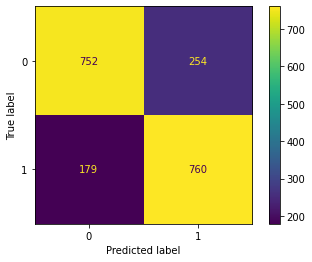

In [34]:
predictions_test = (log_Reg_clf.predict(X_test) > 0.5).astype('int32')

disp = ConfusionMatrixDisplay(confusion_matrix(y_test, predictions_test))
disp.plot()